In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np

## Heatmap Metrics

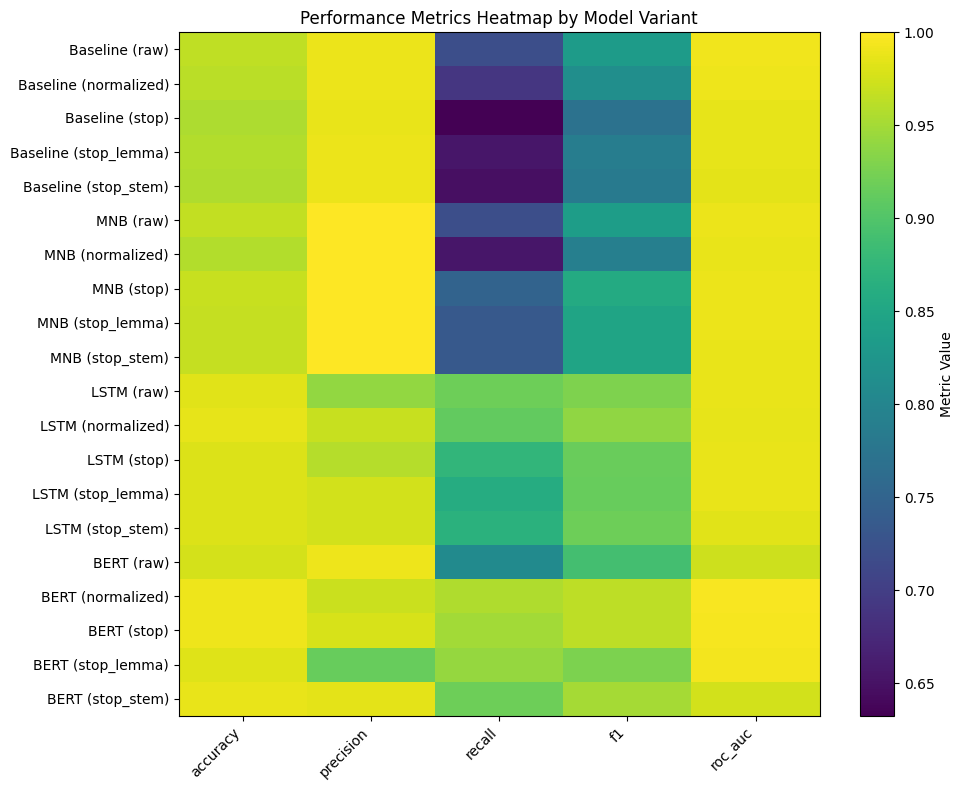

In [3]:

# Load the data into a DataFrame
df = pd.read_csv('data/f_stats.csv')

# Combine model and variant into one label
df['model_variant'] = df['model'] + " (" + df['variant'] + ")"

# Pivot so that rows = Model (Variant), columns = [accuracy, precision, recall, f1, roc_auc]
heatmap_df = df.set_index('model_variant')[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']]

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(heatmap_df, aspect='auto')

ax.set_xticks(range(len(heatmap_df.columns)))
ax.set_xticklabels(heatmap_df.columns, rotation=45, ha='right')
ax.set_yticks(range(len(heatmap_df.index)))
ax.set_yticklabels(heatmap_df.index)

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Metric Value')

plt.title('Performance Metrics Heatmap by Model Variant')
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('data/f_stats.csv')

# Calculate average times by model
avg_times = df.groupby('model')['training_time'].mean().round(4)

# Define the order of models
model_order = ['Baseline', 'MNB', 'LSTM', 'BERT']
avg_times = avg_times.reindex(model_order)

# Manually set MNB value if you want
avg_times['MNB'] = 0.0007

# Create a bar plot of average training times
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=avg_times.index, y=avg_times.values)

plt.title('Average Training Time by Model')
plt.xlabel('Model')
plt.ylabel('Average Training Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate with the real value
for i, v in enumerate(avg_times.values):
    plt.text(i, v + max(avg_times.values)*0.01, f'{v:.4f}s', ha='center', va='bottom', fontsize=10, color='black')

plt.savefig('data/avg_training_times_manual_mnb.png')
plt.close()

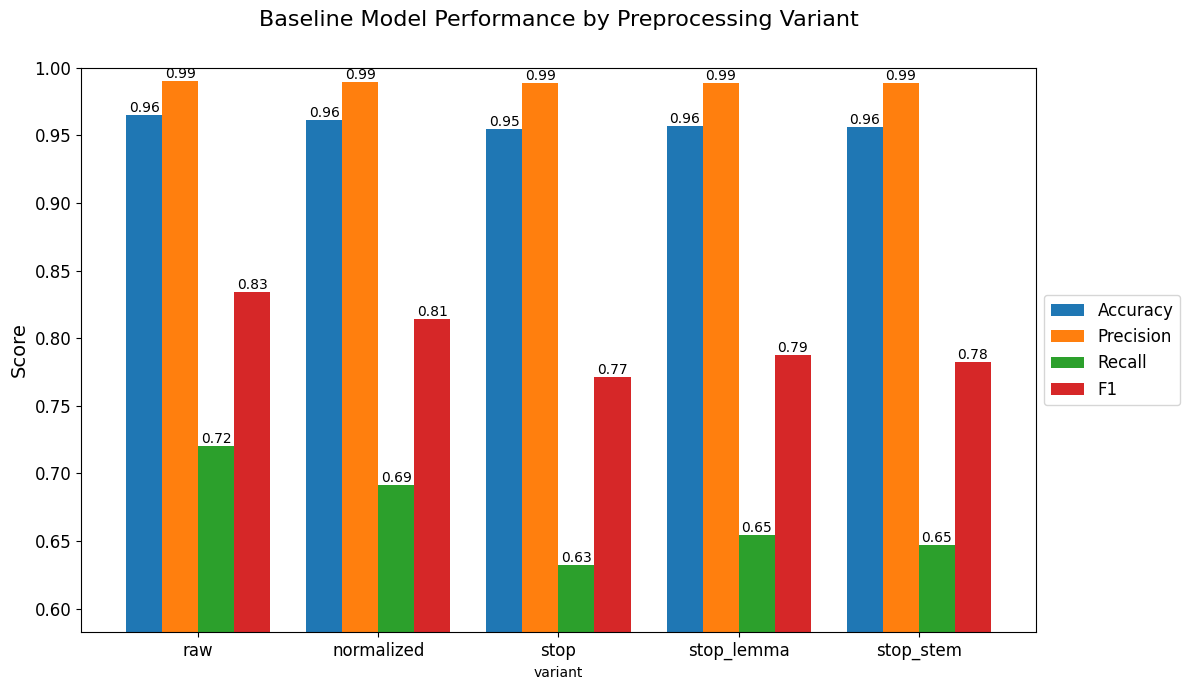

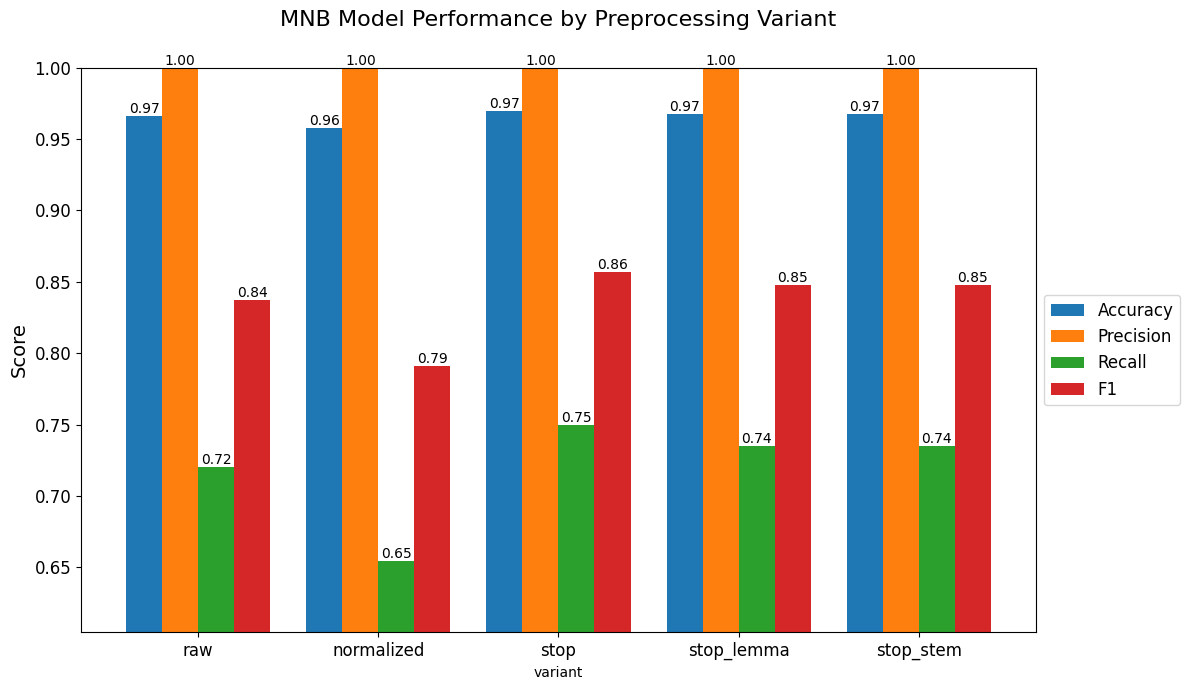

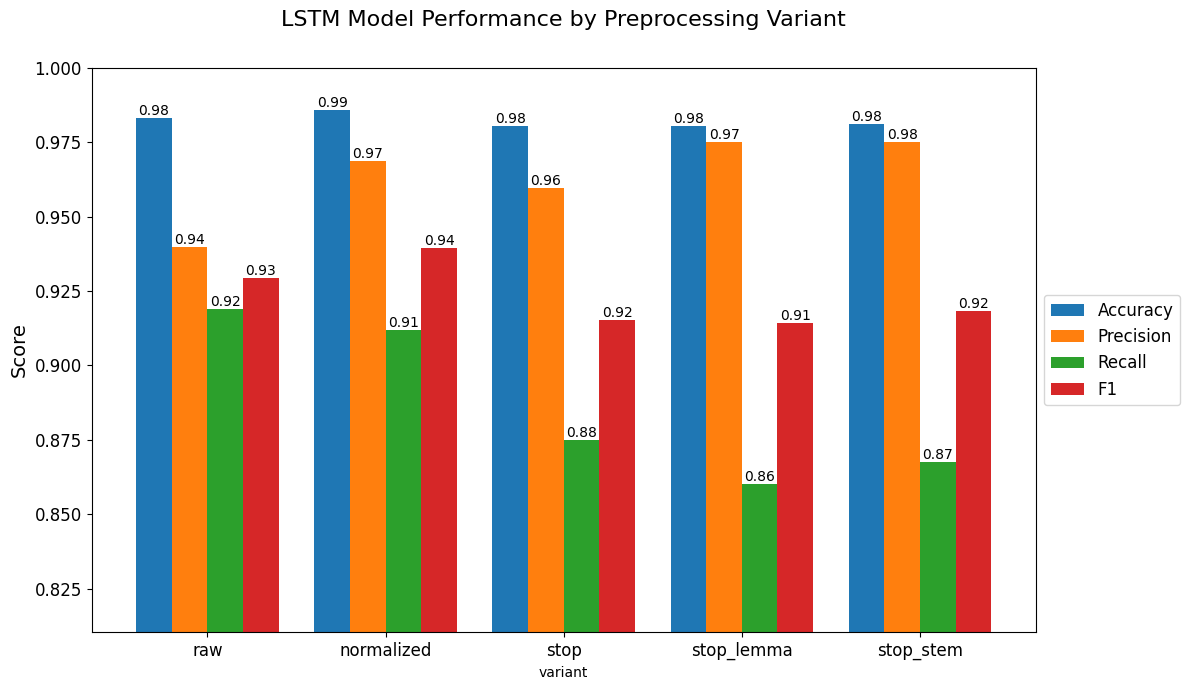

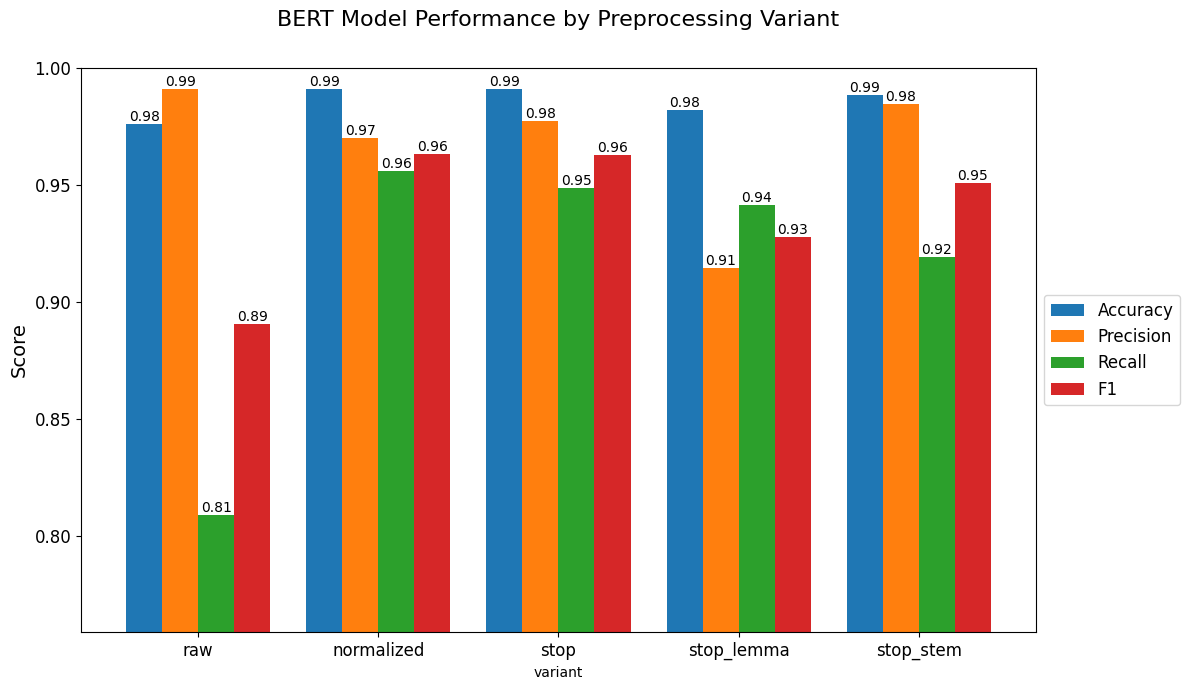

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_model_performance(model_name, csv_path='data/f_stats.csv'):
    # Load the data
    df = pd.read_csv(csv_path)
    
    # Filter for the selected model
    model_df = df[df['model'] == model_name]
    
    # Check if model exists in the data
    if model_df.empty:
        print(f"No data found for model '{model_name}'.")
        return
    
    # Select metrics to plot
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    display_metrics = [m.capitalize() for m in metrics]
    
    # Prepare data for plotting
    plot_df = model_df[['variant'] + metrics].copy()
    plot_df = plot_df.set_index('variant')
    plot_df.columns = display_metrics
    
    # Dynamically set y-axis limits
    ymin = max(0, plot_df.min().min() - 0.05)
    ymax = min(1, plot_df.max().max() + 0.05)
    
    # Plot
    ax = plot_df.plot(
        kind='bar',
        figsize=(12, 7),
        width=0.8
    )
    
    plt.title(f'{model_name} Model Performance by Preprocessing Variant', fontsize=16, pad=30)  # Move title up
    plt.ylabel('Score', fontsize=14)
    plt.ylim(ymin, ymax)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12, rotation=0)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
    plt.subplots_adjust(top=0.85)  # Add extra space at the top
    plt.tight_layout()
    
    # Add value labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black', rotation=0)
    
    plt.show()


# Example usage:
plot_model_performance('Baseline')
plot_model_performance('MNB')
plot_model_performance('LSTM')
plot_model_performance('BERT')

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data/f_stats.csv')

# Set the style
plt.style.use('seaborn')

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Define preprocessing steps order
preprocessing_steps = ['raw', 'normalized', 'stop', 'stop_lemma', 'stop_stem']

# Plot each model's performance
for model in df['model'].unique():
    model_data = df[df['model'] == model]
    plt.plot(preprocessing_steps, 
             model_data.set_index('variant').loc[preprocessing_steps, 'f1'],
             marker='o',
             label=model,
             linewidth=2)

# Customize the plot
plt.title('Model Performance Across Preprocessing Steps', fontsize=14, pad=20)
plt.xlabel('Preprocessing Steps', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0.7, 1.0)  # Set y-axis limits to better show differences
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels on the points
for model in df['model'].unique():
    model_data = df[df['model'] == model]
    for i, (variant, f1) in enumerate(zip(preprocessing_steps, 
                                        model_data.set_index('variant').loc[preprocessing_steps, 'f1'])):
        plt.text(i, f1, f'{f1:.3f}', 
                ha='center', va='bottom', 
                fontsize=8)

plt.tight_layout()
plt.show()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)